# Sentiment analysis of twitter messages using dataset from [kaggle](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?datasetId=1520310&sortBy=voteCount&select=twitter_training.csv)

## 1. Data preprocessing

### 1.1 Loading the dataset

In [129]:
import pandas as pd

In [130]:
#Loading train data
data_train = pd.read_csv("twitter_training.csv",header=None)
data_train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [131]:
#Loading validation data
data_validation = pd.read_csv("twitter_validation.csv",header=None)
data_validation.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [132]:
#Creating new column names
data_train = data_train.rename(
    columns={0:"tweet_ID",1:"entity",2:"sentiment",3:"tweet_content"}
)
data_validation = data_validation.rename(
    columns={0:"tweet_ID",1:"entity",2:"sentiment",3:"tweet_content"}
)

In [133]:
data_train.head()

,tweet_ID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [134]:
data_train.info(), data_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_ID       1000 non-null   int64 
 1   entity         1000 non-null   object
 2   sentiment      1000 non-null   object
 3   tweet_content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


(None, None)

* The training data contains instances with missing data in the `tweet_content` field.
* Given the relatively small quantity of such instances, we will opt to remove them.

### 1.2 Removing missing data

In [135]:
#Shows the missing data
data_train[data_train["tweet_content"].isnull()]

,tweet_ID,entity,sentiment,tweet_content
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


In [136]:
data_train = data_train.dropna()
N, M = data_train.shape
print(f"Dataset now has {N} Rows and {M} Columns")

Dataset now has 73996 Rows and 4 Columns


### 1.3 Cleaning the `tweet_content` Data

The `tweet_content` data will undergo the following cleaning processes:

* Converting text to lowercase
* Removing punctuations, URLs, and special characters
* Removing names, mentions, and hashtags
* Removing stopwords
* Applying stemming


In [137]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#nltk.download('stopwords') - run if stopwords are not downloaded

In [138]:

def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()

    # Remove URLs, punctuations, and special characters
    tweet = re.sub(r"http\S+|[^a-zA-Z0-9\s]", "", tweet)

    # Remove names and hashtags
    tweet = re.sub(r"@\S+|#\S+", "", tweet)

    # Tokenize into words
    words = tweet.split()
    
    # Remove stopwords of all the available languages
    languages = ['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
    for l in languages:
        stop_words = set(stopwords.words(l))
        words = [word for word in words if word not in stop_words]
    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Join the words back into a single string
    processed_tweet = ' '.join(stemmed_words)

    return processed_tweet

In [140]:
data_train['processed_tweet'] = data_train['tweet_content'].apply(preprocess_tweet)

In [141]:
data_train

,tweet_ID,entity,sentiment,tweet_content,processed_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,get borderland 2 murder
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realiz window partit mac like 6 year behind nv...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realiz mac window partit 6 year behind nvidia ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realiz window partit mac 6 year behind nvidia ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realiz window partit mac like 6 year behind nv...


## 2. Exploratory Data Analysis (EDA)


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Barplot of entity

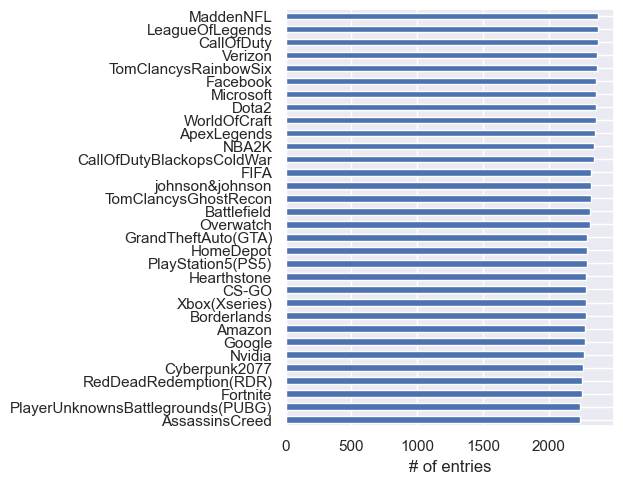

In [143]:
sns.set_theme()

data_train["entity"].value_counts().sort_values().plot(kind='barh')
plt.tight_layout()
plt.xlabel("# of entries")

plt.show()

* It appears that the majority of comments revolve around games, which could potentially shape the interpretation of positive and negative language within this specific community.


### 2.2 Pie plot of sentiment

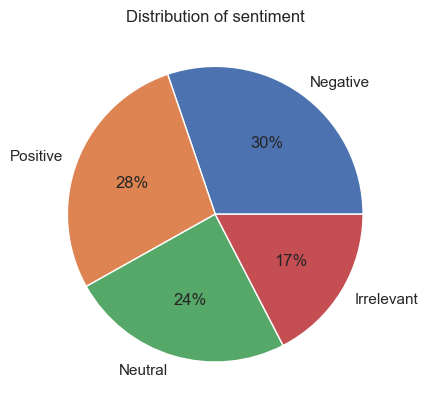

In [144]:
plt.pie(data_train["sentiment"].value_counts(),labels=list(data_train["sentiment"].value_counts().index),autopct='%.0f%%')
plt.title("Distribution of sentiment")
plt.show()

* The distribution of sentiment appears to be balanced.

### 2.3 Distribution of languages in the data

In [145]:
#Function to detect all the languages
from langdetect import detect
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

data_train['detected_language'] = data_train["processed_tweet"].apply(detect_language)

In [146]:
language_counts = data_train['detected_language'].value_counts()
language_counts.shape

(32,)

In [164]:
#Save data since some of the code is computationally slow
data_train.to_csv('cleaned_data.csv', index=False)

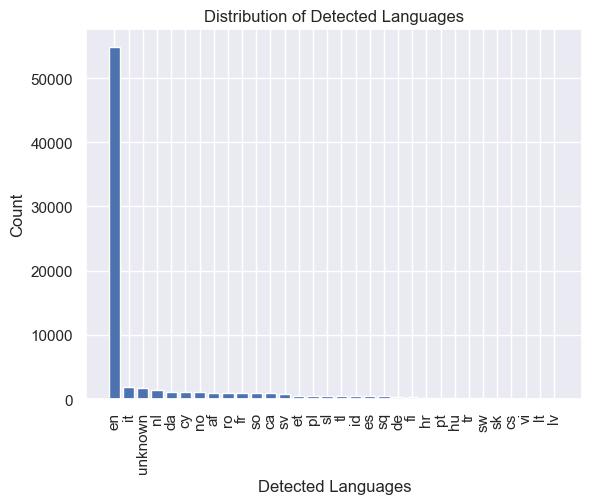

In [165]:
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Detected Languages')
plt.ylabel('Count')
plt.title('Distribution of Detected Languages')
plt.xticks(rotation=90)
plt.show()

* Removing english to get a better picture of the other languages

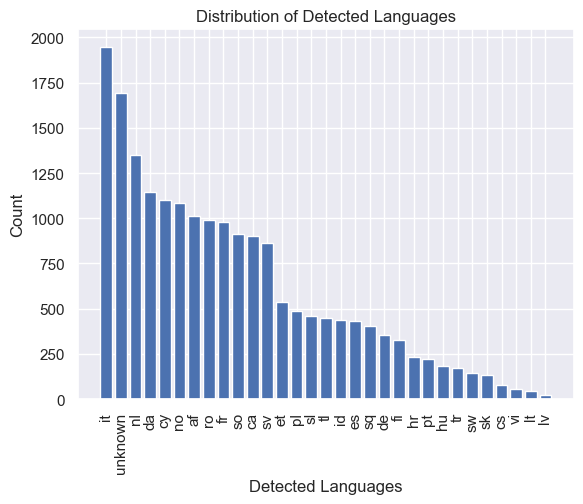

In [166]:
plt.bar(language_counts[1:].index, language_counts[1:].values)
plt.xlabel('Detected Languages')
plt.ylabel('Count')
plt.title('Distribution of Detected Languages')
plt.xticks(rotation=90)
plt.show()

In [163]:
data_train[data_train["detected_language"] == "unknown"].shape

(1695, 6)

In [161]:
data_train[data_train["detected_language"] == "unknown"][100:120]

,tweet_ID,entity,sentiment,tweet_content,processed_tweet,detected_language
3592,1821,CallOfDutyBlackopsColdWar,Irrelevant,I So,,unknown
3593,1821,CallOfDutyBlackopsColdWar,Irrelevant,in,,unknown
3602,1823,CallOfDutyBlackopsColdWar,Irrelevant,Ееееееееееееееееееееееееееееееееееееееееееееее...,,unknown
3647,1830,CallOfDutyBlackopsColdWar,Negative,it's a.,,unknown
3761,1850,CallOfDutyBlackopsColdWar,Positive,to,,unknown
3821,1860,CallOfDutyBlackopsColdWar,Negative,I,,unknown
3845,1864,CallOfDutyBlackopsColdWar,Positive,all,,unknown
3936,1880,CallOfDutyBlackopsColdWar,Negative,,,unknown
3947,1881,CallOfDutyBlackopsColdWar,Irrelevant,to,,unknown
3953,1882,CallOfDutyBlackopsColdWar,Positive,how,,unknown


In [ ]:
data_train.drop(data_train[data_train["detected_language"] == "unknown"].index , inplace = True)

* A diverse range of 32 languages has been detected in the tweets.
* English overwhelmingly dominates the tweet content, followed by a fairly even distribution among other languages.
* Notably, there were 1695 instances of "unknown" languages identified, which were deemed insignificant and subsequently removed—this action was taken prior to the data cleaning process.


## 3. Creating model

### 3.1 Splitting the data

In [194]:
from sklearn.model_selection import train_test_split
X = data_train["processed_tweet"]
y = data_train["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (50610,) (50610,)
Test (21691,) (21691,)


### 3.2 Feature extraction using TF-IDF (Term Frequency-Inverse Document Frequency)

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_Tfid = TfidfVectorizer()
X_train_Tfid = vectorizer_Tfid.fit_transform(X_train)
X_test_Tfid = vectorizer_Tfid.transform(X_test)


#### 3.2.1 Naive Bayes

In [223]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

NB_Tfid = MultinomialNB()
NB_Tfid.fit(X_train_Tfid, y_train)


y_pred = model.predict(X_test_Tfid)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7017196072103637
              precision    recall  f1-score   support

  Irrelevant       0.94      0.37      0.53      3747
    Negative       0.64      0.89      0.75      6596
     Neutral       0.82      0.57      0.68      5332
    Positive       0.67      0.81      0.73      6016

    accuracy                           0.70     21691
   macro avg       0.77      0.66      0.67     21691
weighted avg       0.74      0.70      0.69     21691



#### 3.2.2 Logistic regression

In [233]:
from sklearn.linear_model import LogisticRegression

lr_Tfid = LogisticRegression(solver="liblinear")
lr_Tfid.fit(X_train_Tfid, y_train)

y_pred = lr_Tfid.predict(X_test_Tfid)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7361117514176386
              precision    recall  f1-score   support

  Irrelevant       0.77      0.59      0.67      3747
    Negative       0.74      0.81      0.78      6596
     Neutral       0.73      0.69      0.71      5332
    Positive       0.72      0.79      0.75      6016

    accuracy                           0.74     21691
   macro avg       0.74      0.72      0.73     21691
weighted avg       0.74      0.74      0.73     21691



#### 3.2.3 Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier

rf_Tfid = RandomForestClassifier()
rf_Tfid.fit(X_train_Tfid, y_train)

y_pred = rf_Tfid.predict(X_test_Tfid)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9101009635332626
              precision    recall  f1-score   support

  Irrelevant       0.96      0.85      0.90      3747
    Negative       0.90      0.95      0.92      6596
     Neutral       0.92      0.89      0.91      5332
    Positive       0.89      0.93      0.91      6016

    accuracy                           0.91     21691
   macro avg       0.92      0.90      0.91     21691
weighted avg       0.91      0.91      0.91     21691



### 3.3 Feature extraction using Bag-Of-Words

In [201]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Bag-of-Words vectorizer
vectorizer_bow = CountVectorizer()
# Fit and transform the training data
X_train_bow = vectorizer_bow.fit_transform(X_train)
# Transform the test data using the same vectorizer
X_test_bow = vectorizer_bow.transform(X_test)


#### 3.3.1 Naive Bayes

In [225]:
NB_bow = MultinomialNB()
NB_bow.fit(X_train_bow, y_train)


y_pred = NB_bow.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7250472546217325
              precision    recall  f1-score   support

  Irrelevant       0.80      0.57      0.67      3747
    Negative       0.70      0.83      0.76      6596
     Neutral       0.79      0.62      0.69      5332
    Positive       0.68      0.80      0.74      6016

    accuracy                           0.73     21691
   macro avg       0.74      0.71      0.71     21691
weighted avg       0.74      0.73      0.72     21691



#### 3.3.2 Logistic Regression

In [242]:
lr_bow = LogisticRegression(solver="liblinear")
lr_bow.fit(X_train_bow, y_train)

y_pred = lr_bow.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.7723018763542483
              precision    recall  f1-score   support

  Irrelevant       0.80      0.58      0.67      3747
    Negative       0.79      0.84      0.81      6596
     Neutral       0.80      0.74      0.77      5332
    Positive       0.73      0.84      0.78      6016

    accuracy                           0.77     21691
   macro avg       0.78      0.75      0.76     21691
weighted avg       0.78      0.77      0.77     21691



#### 3.3.3 Random Forest

In [209]:
rf_bow = RandomForestClassifier()
rf_bow.fit(X_train_bow, y_train)

y_pred = rf_bow.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6759024480199161
              precision    recall  f1-score   support

  Irrelevant       0.99      0.24      0.39      3747
    Negative       0.60      0.93      0.73      6596
     Neutral       0.86      0.54      0.67      5332
    Positive       0.66      0.79      0.72      6016

    accuracy                           0.68     21691
   macro avg       0.78      0.62      0.62     21691
weighted avg       0.75      0.68      0.65     21691



## 4. Model Tuning and Enhancement 

* While there is potential for optimization through iterative tuning, it's noteworthy that the Random Forest model already achieves a commendable accuracy of 91%.
* Presented below is an example showcasing hyperparameter optimization using Grid Search.

In [246]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(NB_bow, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bow, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_bow)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'alpha': 0.1}
Test Accuracy: 0.7734544281038218


## 5. Validating the model using validation set

In [211]:
data_validation = data_validation.dropna()
data_validation['processed_tweet'] = data_validation['tweet_content'].apply(preprocess_tweet)
data_validation['detected_language'] = data_validation["processed_tweet"].apply(detect_language)
data_validation.drop(data_validation[data_validation["detected_language"] == "unknown"].index , inplace = True)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [213]:
X_val = data_validation["processed_tweet"]
y_val = data_validation["sentiment"]
X_val_features = vectorizer.transform(X_val)

In [245]:
y_pred = rf.predict(X_val_features)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.9569569569569569
              precision    recall  f1-score   support

  Irrelevant       0.98      0.92      0.95       172
    Negative       0.92      0.97      0.95       265
     Neutral       0.96      0.95      0.96       285
    Positive       0.97      0.96      0.97       277

    accuracy                           0.96       999
   macro avg       0.96      0.95      0.96       999
weighted avg       0.96      0.96      0.96       999



95% accuracy on the validationset using Random Forest